<h1>Spotify Data Analysis and Visualization - Analiza i vizuelizacija podataka sa Spotify-a</h1>

<h4>Importing libaries and reading datasets - Učitavanje biblioteka i skupova podataka</h4>

In [16]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/data.csv')
genre_data = pd.read_csv('data/data_by_genres.csv')
year_data = pd.read_csv('data/data_by_year.csv')
artist_data = pd.read_csv('data/data_by_artist.csv')
data_w_genre = pd.read_csv('data/data_w_genres.csv')
tracks_2022 = pd.read_csv('data/track_data.csv')

<h4>Dataset Information - Informacije o skupovima podataka</h4>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [18]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [19]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [20]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [21]:
data_w_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [22]:
tracks_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>Data Analysis - Analiza podataka</h3>
<h4>Feature Correlation - Korelacija između ???</h4>

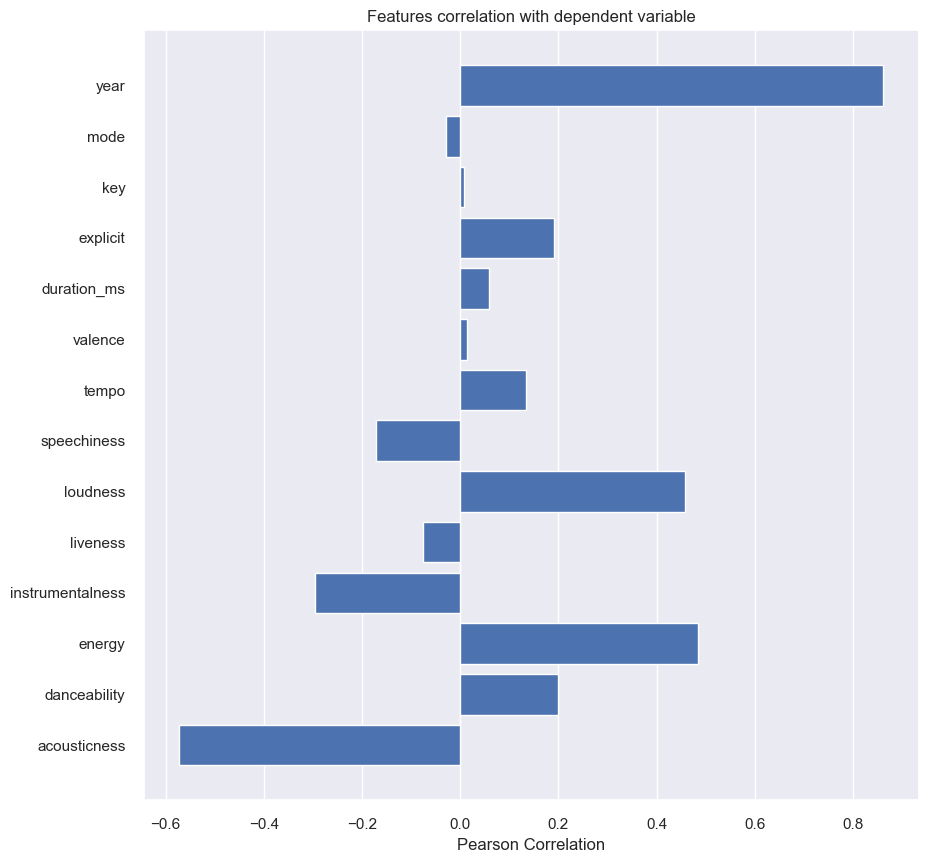

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [23]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,10)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<h4>Feature trend over years - ???</h4>

<AxesSubplot:xlabel='count', ylabel='artist_genres'>

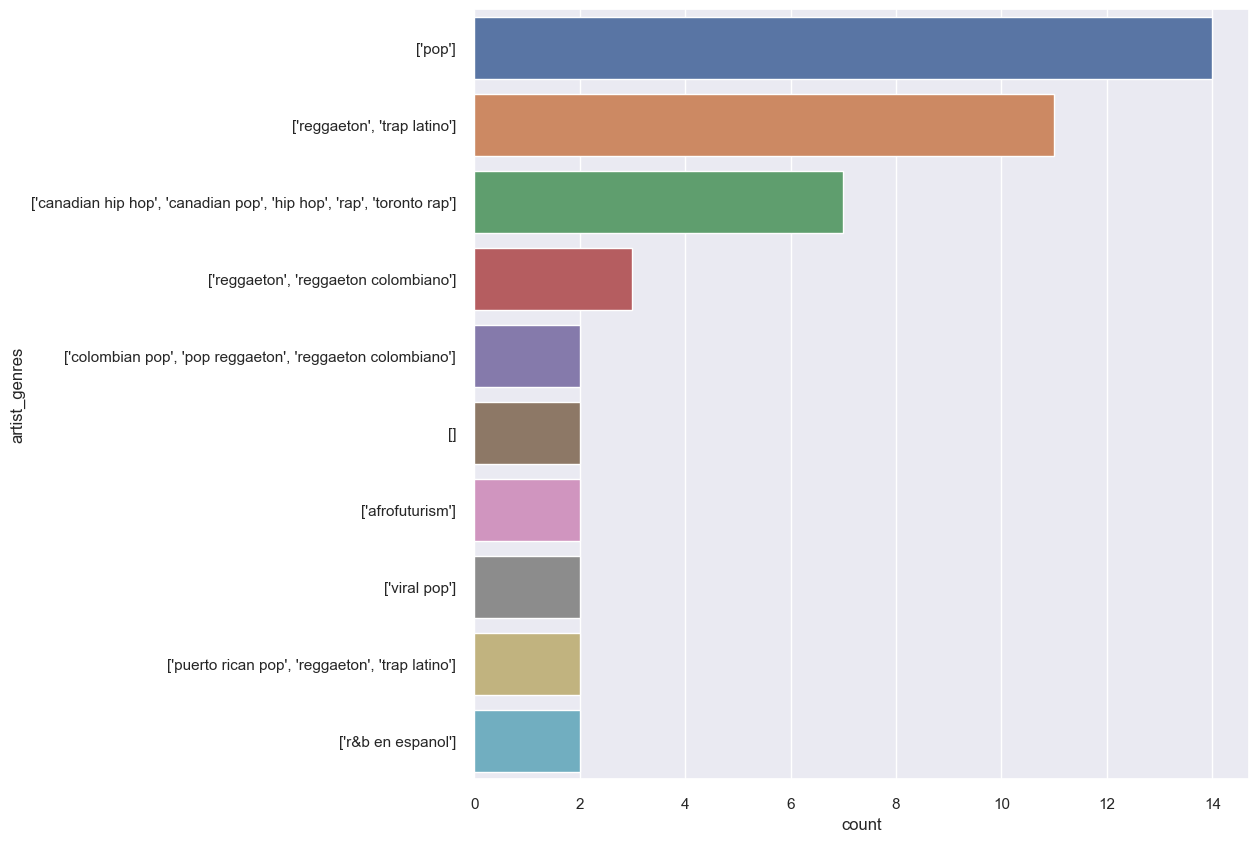

In [24]:
songs_by_popularity = tracks_2022.sort_values('track_popularity', ascending = False).head(100)
songs_by_popularity.head()

sns.countplot(y=songs_by_popularity['artist_genres'],order=songs_by_popularity['artist_genres'].value_counts().iloc[:10].index)

<h4>Number of songs per decades - Broj pesama po dekadama</h4>

<AxesSubplot:xlabel='decade', ylabel='count'>

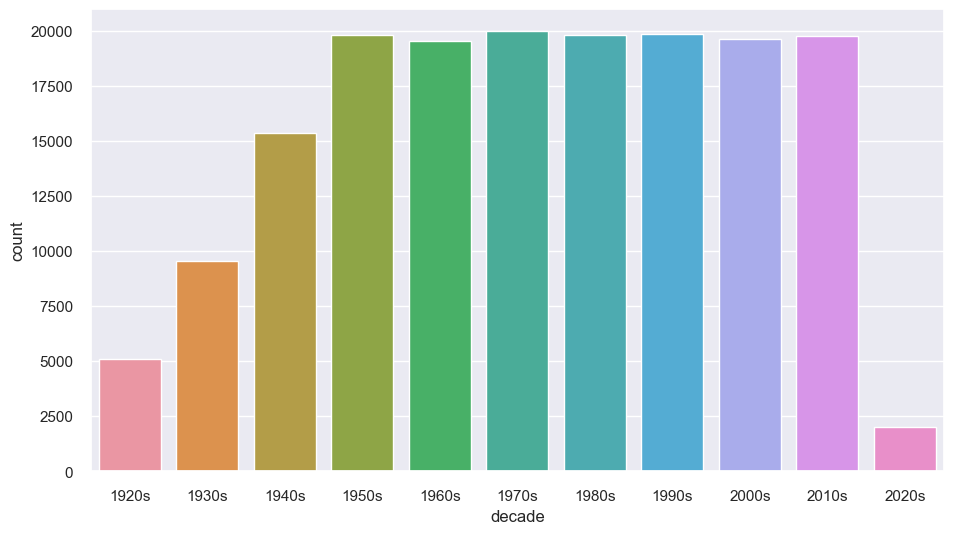

In [25]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x=data['decade'])

<h4>Comparing songs before 90s and songs after 90s - Upoređivanje pesama pre 90tih i pesama posle 90tih</h4>

C:\Users\jelen\AppData\Local\Temp\ipykernel_5540\1959543866.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jelen\AppData\Local\Temp\ipykernel_5540\1959543866.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



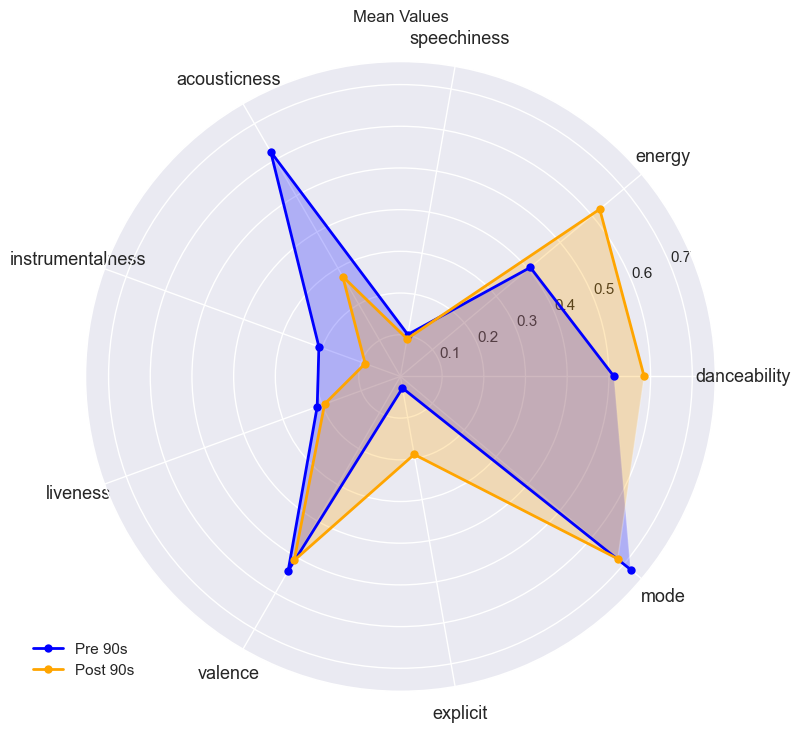

In [26]:
data_pre90 = data[data['year'] <= 1990]
data_post90 = data[data['year'] > 1990]
labels = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'explicit', 'mode']

mean_vals_pre90 = pd.DataFrame(columns=labels)
mean_vals_post90 = pd.DataFrame(columns=labels)
mean_vals_pre90 = mean_vals_pre90.append(data_pre90[labels].mean(), ignore_index=True)
mean_vals_post90 = mean_vals_post90.append(data_post90[labels].mean(), ignore_index=True)

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_vals_pre90.iloc[0], 'o-', linewidth=2, label = "Pre 90s", color= 'blue')
ax.fill(angles, mean_vals_pre90.iloc[0], alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)

ax.plot(angles, mean_vals_post90.iloc[0], 'o-', linewidth=2, label = "Post 90s", color= 'orange')
ax.fill(angles, mean_vals_post90.iloc[0], alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

<h4>Top 30 most popular genres from 2022 - Top 30 najpopularnijih žanrova 2022.</h4>

C:\Users\jelen\AppData\Local\Temp\ipykernel_5540\772510865.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jelen\AppData\Local\Temp\ipykernel_5540\772510865.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\jelen\AppData\Local\Temp\ipykernel_5540\772510865.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



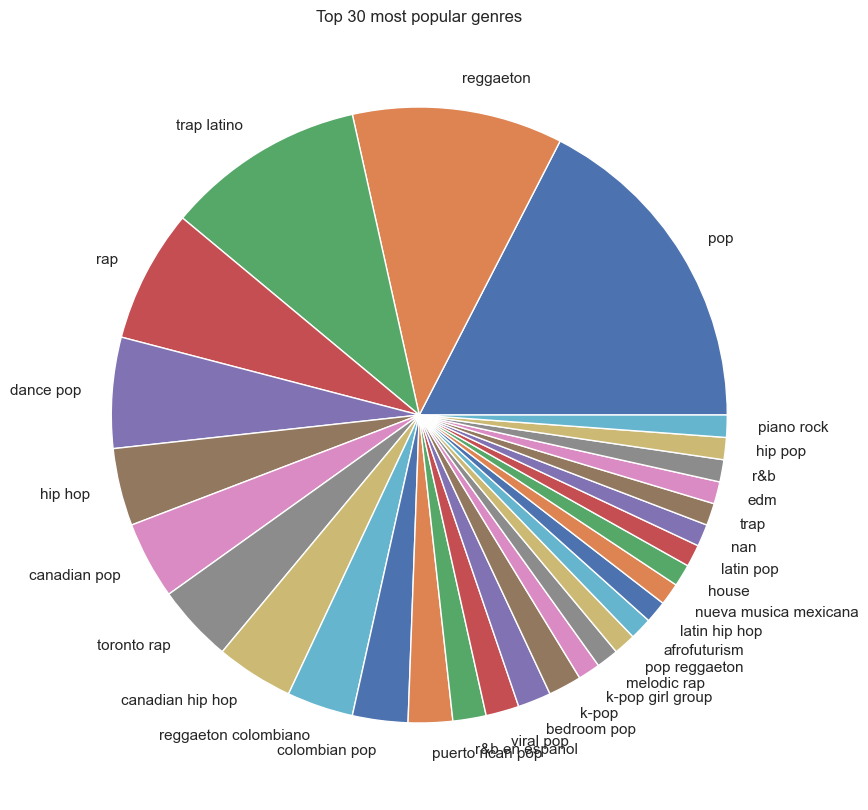

In [28]:
songs_by_popularity['artist_genres']=songs_by_popularity['artist_genres'].astype(str)
songs_by_popularity["artist_genres"][songs_by_popularity["artist_genres"] == "[]"] = np.nan
songs_by_popularity["artist_genres"] = songs_by_popularity["artist_genres"].fillna(0)
#here we get rid of useless symbols to be able to separate genres

songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("[", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("]", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.replace("'", "")
songs_by_popularity.artist_genres=songs_by_popularity.artist_genres.str.strip()
#now we devide genre strings by comma
songs_by_popularity["artist_genres"] = songs_by_popularity["artist_genres"].str.split(",")

songs_by_popularity=songs_by_popularity.explode('artist_genres')
songs_by_popularity.artist_genres.unique()
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
songs_by_popularity.artist_genres.value_counts()[:30].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 30 most popular genres")
plt.show()